In [1]:
import numpy as np
import matplotlib.pyplot as plt
def phi(x):
    F = np.sin(2 * np.pi * x) * np.cos(5 * np.pi * x)
    return F


In [2]:
def gaussian(x1, x2, l = 1):
    f = np.exp(-(x1 - x2) ** 2 / (2 * l ** 2))
    return f

In [3]:
def kernel_matrix(X, l = 1, f = gaussian):
    G = np.zeros([len(X), len(X)])
    for i in range(len(X)):
        for j in range(len(X)):
            G[i, j] = f(X[i], X[j], l)
    return G

In [4]:
def rbf_model(G, d):
    m = np.dot(np.linalg.inv(G), d)
    return m

In [5]:
def rbf_predict(x, X, m, l = 1, f = gaussian):
    S = np.zeros(len(x))
    for i in range(len(m)):
        S = S + m[i] * f(x, X[i], l)
    return S

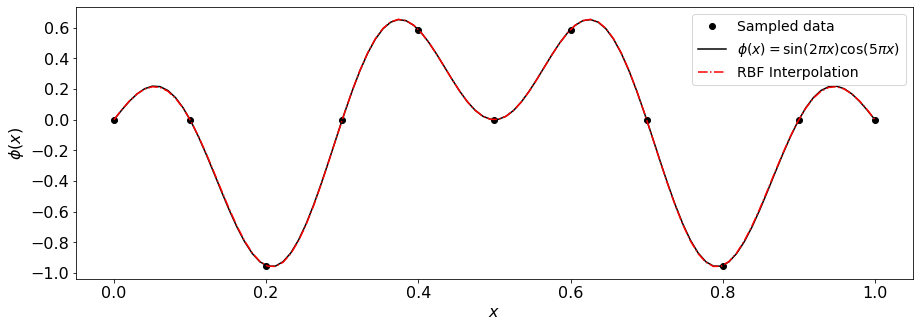

In [6]:
# Sample 10 values of X and phi.
N = 10
X = np.arange(0, N + 1, 1) / N
d = phi(X)
# Gaussian length scale.
L = 1 / 9
# Calculate the kernel matrix G
G = kernel_matrix(X, L, gaussian)

# Invert d = Gm for the model parameters.
m = rbf_model(G, d)
# Using m, interpolate phi for all values in x ∈ [0, 1].
x = np.linspace(0, 1, 100)
S = rbf_predict(x, X, m, L, gaussian)
# Plot the results.
plt.figure(figsize = [15, 5])
plt.plot(X, d, "ko")     # Sampled discrete data points of phi.
plt.plot(x, phi(x), "k") # True "continuous" values of phi.
plt.plot(x, S, "r-.")    # # Interpolated values of phi.
plt.legend(["Sampled data", 
            "$\phi(x) = \sin(2 \pi x) \cos(5 \pi x)$", 
            "RBF Interpolation"], fontsize = 14)
plt.xlabel("$x$", fontsize = 16)
plt.ylabel("$\phi(x)$", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

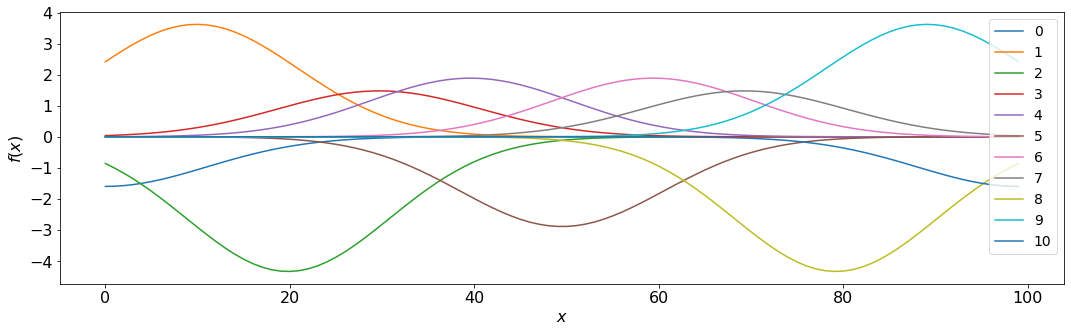

In [7]:
# Plot the 10 weighted Gaussians used in the interpolation model.
plt.figure(figsize = [18, 5])
for i in range(len(m)):
    plt.plot(m[i] * gaussian(x, X[i], L))
plt.legend(range(len(m)), fontsize = 14)
plt.xlabel("$x$", fontsize = 16)
plt.ylabel("$f(x)$", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

### Q1 : Use RBF to interpolate the function of the previous PS.

### Q2 : Use the RBF surrogate model in the optimisation procedure instead to find the optimum. 

### Q3 : Compare the number of function evaluations required.